## Understanding your data 

<ul>
  <li>Check for validity</li>
  <li>Understand distribution</li>
  <li>Look out for trends and correlation</li>
</ul>  

Plotting your graphs and calculating the five-number summary helps!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix

## Commands used in all plots 

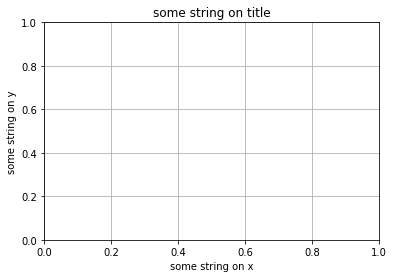

In [2]:
plt.xlabel('some string on x')
plt.ylabel('some string on y')
plt.title('some string on title')
plt.grid(True)
plt.show() # Always must be called 

## Using numpy arrays simplifies calculations 

### Here you see how y can be calculated directly

In [3]:
x = np.array( range(-10, 10) )
y = x**2 + 2*x + 1

## This is how we can plot lines and points on the same graph. 

### This example also shows how you can display a legend

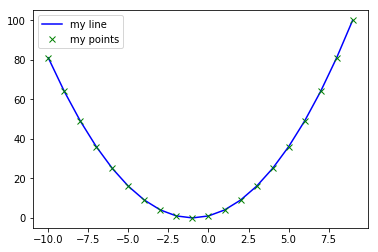

In [4]:
a = plt.plot(x,y,color='blue')
b = plt.plot(x,y,'gx')
'''a, b are a list of references to line objects'''
plt.legend([a[0],b[0]],['my line','my points'])
plt.show()

## However, the plot command is not suitable for our dataset

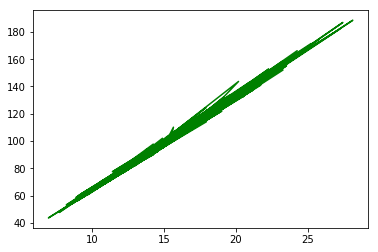

In [5]:
bunchobject = datasets.load_breast_cancer()
data = bunchobject.data
x = data[:,0]
y = data[:,2]
a = plt.plot(x,y,color='green')
plt.show()

## That is why we use the scatter command instead

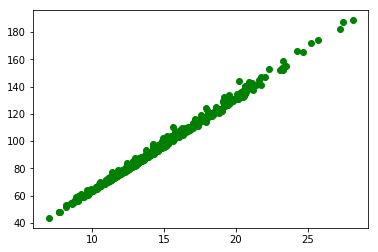

In [6]:
bunchobject = datasets.load_breast_cancer()
data = bunchobject.data
x = data[:,0]
y = data[:,2]
a = plt.scatter(x,y,color='green')
plt.show()

## Other commands you need for Question 1 

### Please read the documentation or watch the videos provided

<ul>
<li> plt.boxplot</li>
<li> plt.hist</li>
<li> plt.scatter</li>
<li> plt.barchart</li>

## Extracting one column from a numpy array gives you a 1D list i.e. a list of n elements. 

### the shape method gives you the dimensions of the array

### If you want a 2D array ( n by 1 array) then use the np.newaxis parameter to add a new dimension. 

In [7]:
z1 = np.array( range(10))
print('==this is a 1D array ==')
print(z1.shape)
print(z1)
z2 = z1[:,np.newaxis]
print('==this is a 2D array ==')
print(z2.shape)
print(z2)

==this is a 1D array ==
(10,)
[0 1 2 3 4 5 6 7 8 9]
==this is a 2D array ==
(10, 1)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


### Similar for the breast cancer dataset 

In [8]:
print('==this is a 1D array==')
x1 = bunchobject.data[:, 0]
print(x1.shape)
#print(x1)

print('==this is a 2D n by 1 array==')
x2 = bunchobject.data[:, np.newaxis, 0]
print(x2.shape)
#print(x2)

print('==this is a 2D 1 by n array==')
print('you are not likely to need this')
x3 = bunchobject.data[np.newaxis, :, 0]
print(x3.shape)
#print(x3)



==this is a 1D array==
(569,)
==this is a 2D n by 1 array==
(569, 1)
==this is a 2D 1 by n array==
you are not likely to need this
(1, 569)


In [9]:
## The above is the tutorial from Norman

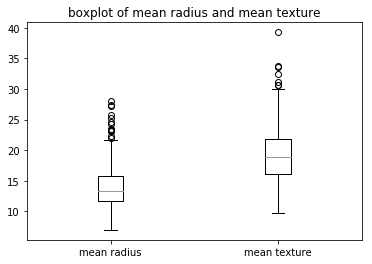

In [10]:
def display_box_plots(data, feature_names, title_name='default'):
    plt.boxplot(data)
    plt.title(title_name)
    num_of_features = feature_names.shape[0]
    tick_marks = range(1,num_of_features+1)
    plt.xticks(tick_marks, feature_names)  # make ticks after boxplot please
    plt.show()

bunchobject = datasets.load_breast_cancer()
feature_range = [0, 1]
data_subset = bunchobject.data[:,feature_range]
feature_names_subset = bunchobject.feature_names[feature_range]
display_box_plots(data_subset,feature_names_subset, title_name="boxplot of mean radius and mean texture")

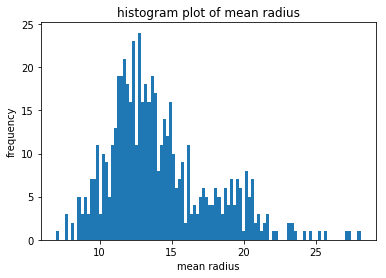

In [11]:
def display_histogram(data, nbins, feature_name, title_name='default'):
    plt.hist(data, bins=nbins)
    plt.title(title_name)
    plt.xlabel(feature_name)
    plt.ylabel("frequency")
    plt.show()
    
feature_col = 0
one_col_data = data_subset[:,feature_col]
feature_name_selected = bunchobject.feature_names[feature_col]
number_of_bins = 100 #please specify a suitable value
title_string = 'histogram plot of mean radius' #please provide a suitable title string
display_histogram(one_col_data, number_of_bins, feature_name_selected, title_string)

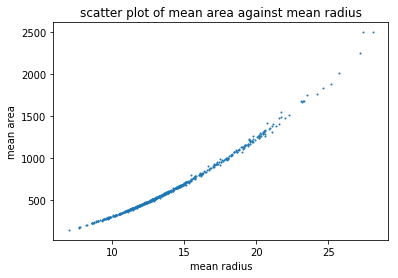

In [12]:
def display_scatter(x,y, xlabel='x', ylabel='y',title_name ='default'):
    plt.scatter(x,y,s=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title_name)
    plt.show()
    
x_index = 0
y_index = 3
x = bunchobject.data[:,x_index]
y = bunchobject.data[:,y_index]
x_label = bunchobject.feature_names[x_index]
y_label = bunchobject.feature_names[y_index]
display_scatter(x,y,x_label,y_label, title_name="scatter plot of mean area against mean radius")

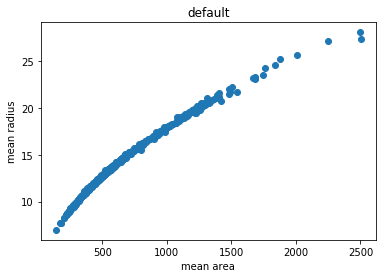

In [13]:
def display_scatter(x, y, xlabel = 'x', ylabel = 'y', title_name = 'default'):
    plt.scatter(x,y)
    plt.title(title_name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

bunchobject = datasets.load_breast_cancer()
x_index = 3
y_index = 0
x = bunchobject.data[:,x_index]
y = bunchobject.data[:,y_index]
x_label = bunchobject.feature_names[x_index]
y_label = bunchobject.feature_names[y_index]
display_scatter(x,y,x_label,y_label)

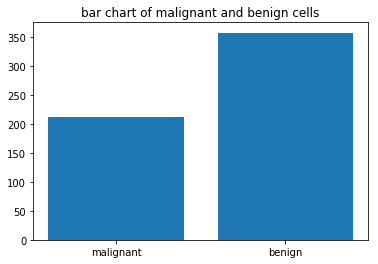

In [14]:
def display_bar_chart(positions, counts, names, title_name='default'):
    plt.bar(positions, counts)
    plt.title(title_name)
    num_of_features = names.shape[0]
    tick_marks = range(num_of_features)
    plt.xticks(tick_marks, names)  # make ticks after boxplot please
    plt.show()

unique, counts = np.unique(bunchobject.target, return_counts = True)
title_name = "bar chart of malignant and benign cells"
display_bar_chart(unique, counts, bunchobject.target_names, title_name)

In [15]:
import numpy as np

def five_number_summary(x):
    x = np.transpose(x)
    lst = []
    for i in range(len(x)):
        dict_ = {}
        dict_['minimum'] = np.min(x[i])
        dict_['first quartile'] = np.percentile(x[i],25)
        dict_['median'] = np.percentile(x[i],50)
        dict_['third quartile'] = np.percentile(x[i],75)
        dict_['maximum'] = np.max(x[i])
        lst.append(dict_)
    return lst

first_column = bunchobject.data[:,np.newaxis,1]
print(five_number_summary(first_column))

col_no = [0,1,2]
some_columns = bunchobject.data[:,col_no]
print( five_number_summary(some_columns) )

[{'minimum': 9.71, 'first quartile': 16.17, 'median': 18.84, 'third quartile': 21.8, 'maximum': 39.28}]
[{'minimum': 6.981, 'first quartile': 11.7, 'median': 13.37, 'third quartile': 15.78, 'maximum': 28.11}, {'minimum': 9.71, 'first quartile': 16.17, 'median': 18.84, 'third quartile': 21.8, 'maximum': 39.28}, {'minimum': 43.79, 'first quartile': 75.17, 'median': 86.24, 'third quartile': 104.1, 'maximum': 188.5}]


In [16]:
def normalize_minmax(data):
    data = np.transpose(data)
    result = []
    for col in data:
        col -= np.min(col)
        col /= np.max(col)
        result.append(col)
    return np.transpose(result)

first_column = bunchobject.data[:,np.newaxis,1]
first_column_norm = normalize_minmax(first_column)
print(five_number_summary(first_column_norm))

cols = [1, 7]
some_columns = bunchobject.data[:,cols]
snorm = normalize_minmax(some_columns)
print('normalized', five_number_summary(snorm))

[{'minimum': 0.0, 'first quartile': 0.21846466012850865, 'median': 0.30875887724044637, 'third quartile': 0.40886033141697664, 'maximum': 1.0}]
normalized [{'minimum': 0.0, 'first quartile': 0.21846466012850865, 'median': 0.30875887724044637, 'third quartile': 0.40886033141697664, 'maximum': 1.0}, {'minimum': 0.0, 'first quartile': 0.10094433399602387, 'median': 0.1665009940357853, 'third quartile': 0.36779324055666, 'maximum': 1.0}]


In [17]:
from scipy.optimize import linprog
c = [-500,-450]
A_ub = [[6,5],[1,2],[1,0]]
b_ub = [60,15,8]
linprog(c, A_ub=A_ub, b_ub=b_ub)

     fun: -5142.857142857143
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.        , 0.        , 1.57142857])
  status: 0
 success: True
       x: array([6.42857143, 4.28571429])

In [18]:
import numpy as np
from scipy.optimize import linprog
c = [500,450]
A_ub = [[6,5],[1,2],[1,0]]
b_ub = [60,15,8]
linprog(-np.array(c), A_ub=A_ub, b_ub=b_ub)

     fun: -5142.857142857143
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.        , 0.        , 1.57142857])
  status: 0
 success: True
       x: array([6.42857143, 4.28571429])

In [19]:
import numpy as np
from scipy.optimize import linprog
c = [2,4]
A_ub = [[1,2],[2,-3],[1,1]]
b_ub = [10,6,6]
linprog(-np.array(c), A_ub=A_ub, b_ub=b_ub)

     fun: -20.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([ 0., 21.,  1.])
  status: 0
 success: True
       x: array([0., 5.])

In [20]:
np.diag([
[54,-220,26,-66],
[12,-50,6,-15],
[86,-352,45,-108],
[40,-160,20,-50]
])

array([ 54, -50,  45, -50])